In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
## load the data
train_path = r"data\train_data.csv"
train_df = pd.read_csv(train_path)
train_df = train_df.sample(n=10000)
train_df.head()

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,c1,c2,c3,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice,winBid,has_won
6510019,1656898788246,banner,Generic,com.loop.match3d,1245.35.0,Android 4.0,US,808d3dcd551,Android-4.0,3G,7d3,7.0,6b,6.0,320x50,11.4.3,0.01,0.16,2.72,0
5041187,1657159721387,banner,Generic,com.loop.match3d,1245.35.0,Android 4.0,US,6a79a2cfac2,Android-4.0,WIFI,7d3,8.0,6b,8.0,320x50,11.4.3,0.01,0.73,2.03,0
6660007,1657066904817,interstitial,Generic,com.loop.match3d,1245.34.0,Android 4.0,BR,74ca7fd3bc0,Android-4.0,WIFI,8bd,9.0,6b,4.0,320x480,11.4.2,0.01,0.16,0.82,0
1730076,1656355103060,banner,Generic,com.loop.match3d,1245.34.0,Android 4.0,GB,80b0638c574,Android-4.0,WIFI,7d3,3.0,6b,5.0,320x50,11.4.2,0.01,0.04,0.08,0
563470,1656443284190,rewarded,Apple,1502447854,1245.34.0,iPhone,GB,8022434fc01,iOS-15.5,WIFI,82a,4.0,4b,2.0,320x480,11.4.1,0.01,1.39,9.76,0


In [3]:
## check for duplicate rows

train_df[train_df.duplicated()]

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,c1,c2,c3,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice,winBid,has_won


In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_df.describe()

,eventTimestamp,c2,c4,bidFloorPrice,sentPrice,winBid,has_won
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,1657041877421.26,5.00,5.01,0.02,0.59,4.29,0.11
std,397859504.67,2.33,2.34,0.13,2.66,20.96,0.31
min,1656290456139.00,1.00,1.00,0.01,0.01,0.01,0.00
25%,1656705462830.50,3.00,3.00,0.01,0.02,0.10,0.00
50%,1657041514511.50,5.00,5.00,0.01,0.04,0.53,0.00
75%,1657389725703.25,7.00,7.00,0.01,0.17,1.61,0.00
max,1657758889168.00,9.00,9.00,5.00,91.19,1247.10,1.00


In [5]:
train_df.deviceId.nunique() / len(train_df)

0.4484

In [6]:
train_df['size'].value_counts()

320x50      7076
320x480     1958
728x90       777
768x1024     186
480x320        2
1024x768       1
Name: size, dtype: int64

In [7]:
train_df.winBid.quantile(0.95)

1238.368973190105

In [8]:
## % of missing values
null_counts = train_df.isnull().sum()
null_df = pd.DataFrame(data={'counts': null_counts, 'percentage': null_counts / len(train_df)})
null_df

,counts,percentage
eventTimestamp,0,0.00
unitDisplayType,0,0.00
brandName,0,0.00
bundleId,0,0.00
appVersion,0,0.00
correctModelName,0,0.00
countryCode,0,0.00
deviceId,0,0.00
osAndVersion,0,0.00
connectionType,1,0.00


In [9]:
train_df[train_df['connectionType'].isnull()]['winBid'].mean()

0.16

In [10]:
train_df[train_df['countryCode'].isnull()]['winBid'].mean()

nan

In [11]:
list(train_df.columns)

['eventTimestamp',
 'unitDisplayType',
 'brandName',
 'bundleId',
 'appVersion',
 'correctModelName',
 'countryCode',
 'deviceId',
 'osAndVersion',
 'connectionType',
 'c1',
 'c2',
 'c3',
 'c4',
 'size',
 'mediationProviderVersion',
 'bidFloorPrice',
 'sentPrice',
 'winBid',
 'has_won']

### Numeric features

C:\Users\inbal\AppData\Local\Temp\ipykernel_18312\2979328035.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((train_df.drop(['eventTimestamp', 'has_won', 'sentPrice'], axis=1)).corr(), annot=True, cmap='coolwarm')


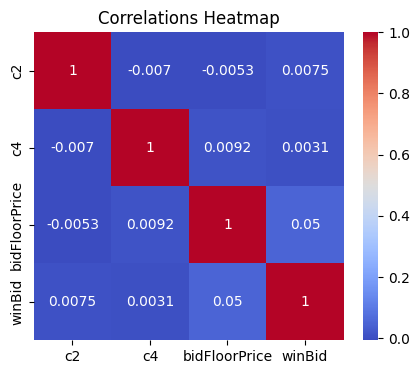

In [12]:
## checking for correlations between numerical columns including the target

plt.figure(figsize=(5, 4))
sns.heatmap((train_df.drop(['eventTimestamp', 'has_won', 'sentPrice'], axis=1)).corr(), annot=True, cmap='coolwarm')
plt.title('Correlations Heatmap')
plt.show()

### Categorical features

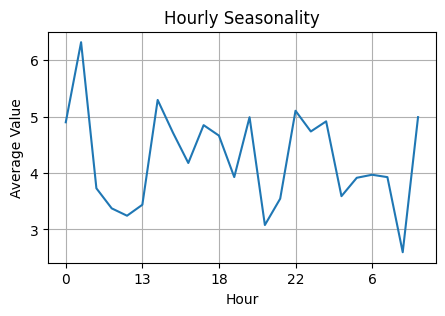

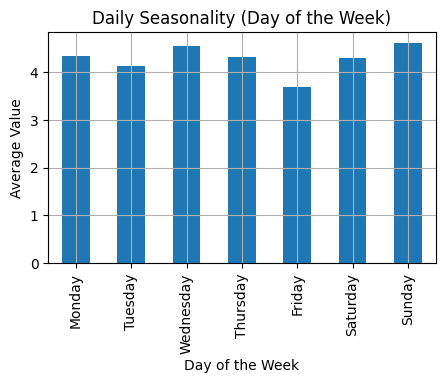

In [13]:
## explore time-related features

train_df['datetime'] = pd.to_datetime(train_df['eventTimestamp'], unit='ms')
train_df['hour'] = train_df['datetime'].dt.hour.astype(str)
train_df['day_of_week'] = train_df['datetime'].dt.day_name()


# Hour of day
hourly_avg = train_df.groupby('hour')['winBid'].mean()
plt.figure(figsize=(5, 3))
hourly_avg.plot(kind='line')
plt.title('Hourly Seasonality')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = train_df.groupby('day_of_week')['winBid'].mean().reindex(day_order)
plt.figure(figsize=(5, 3))
daily_avg.plot(kind='bar')
plt.title('Daily Seasonality (Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

In [14]:
# # Visualize the distribution of a numerical column
# plt.figure(figsize=(10, 6))
# sns.histplot(data=train_df, x='numerical_column')
# plt.title('Distribution of Numerical Column')
# plt.show()

# # Visualize the relationship between two numerical columns
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train_df, x='numerical_column1', y='numerical_column2')
# plt.title('Relationship between Numerical Column 1 and Numerical Column 2')
# plt.show()

# # Visualize the relationship between a categorical column and a numerical column
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=train_df, x='categorical_column', y='numerical_column')
# plt.title('Categorical Column vs. Numerical Column')
# plt.show()

# Data Pre-processing

In [15]:
import numpy as np
def preprocessing(data: pd.DataFrame, test_data: pd.DataFrame, category_coverage_threshold=0.01):
    # combine
    if 'has_won' in data.columns:
        data = data.drop(columns=['has_won'])
    train_data_len, test_data_len = len(data), len(test_data)
    
    data = pd.concat([data, test_data], ignore_index=True)

    # drops
    data = data.drop(columns=['sentPrice', 'deviceId', 'bundleId', 'appVersion','correctModelName', 'brandName'])

    # imputations
    other_category = 'other'
    data.fillna({'countryCode': other_category, 'connectionType': other_category},inplace=True)

    # feature engineering

    ## convert timestamp to temporal features
    data['datetime'] = pd.to_datetime(data['eventTimestamp'], unit='ms')
    data['hour'] = data['datetime'].dt.hour.astype(str)
    data['day_of_week'] = data['datetime'].dt.day_name()
    data = data.drop(columns=['datetime', 'eventTimestamp'])

    ## extract aspect ratio from the size of the ad
    data['aspect_ratio'] = data['size'].apply(lambda s: int(s.split('x')[0]) / int(s.split('x')[1]))

    ## replace infrequent categorical values
    categorical_features_df = data.select_dtypes(include=['object', 'category'])
    categorical_features_names = list(categorical_features_df.columns)

    for feature in categorical_features_names:
        category_counts = categorical_features_df[feature].value_counts()
        total_count = category_counts.sum()
        categories_to_group = category_counts[category_counts / total_count <= category_coverage_threshold].index
        categorical_features_df.loc[categorical_features_df[feature].isin(categories_to_group), feature] = other_category

    ## perform one-hot encoding
    onehot_df = pd.get_dummies(categorical_features_df, drop_first=True)

    data = data.merge(onehot_df, left_index=True, right_index=True)
    data = data.drop(columns=categorical_features_names)
    return data[:train_data_len], data[train_data_len:]


def preprocess_target(data: pd.Series, winsorization_upper_quantile=0.99, apply_logscale_to_target=False):
    data = data.clip(upper=data.quantile(winsorization_upper_quantile))
    if apply_logscale_to_target:
        data = np.log(data)
    return data


def postprocess_target(data: pd.Series, winsorization_upper_quantile=0.99, apply_logscale_to_target=False):
    if apply_logscale_to_target:
        data = np.exp(data)
    return data



## Modelling

In [22]:
train_path = r"data\train_data.csv"
train_df = pd.read_csv(train_path)

test_path = r"data\test_data.csv"
test_df = pd.read_csv(test_path)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [23]:
from sklearn.model_selection import train_test_split

category_coverage_threshold = 0.01
test_size = 0.2
sample_size = int(500000) # None for all
y_column = "winBid"
if sample_size is None:
    sample_size = len(train_df)

train_df = train_df.sample(n=sample_size)
X, y = train_df.drop(columns=[y_column]), train_df[y_column]
X, test_df = preprocessing(data=X, test_data=test_df, category_coverage_threshold=category_coverage_threshold)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state=RANDOM_SEED)

# Training

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import HuberRegressor


def train_model(X_train, y_train, cv=2):
    pl = Pipeline([
        ('est',  DummyRegressor())
    ])

    param_grid=[
        # Strong Model
        {'est': [xgb.XGBRegressor()], 'est__n_estimators':[100, 200],
                                        'est__gamma': [0.5, 2.0],
                                        'est__max_depth': [5, 10]
                                        },
        # Robust Models
        {'est': [HuberRegressor()], 'est__epsilon': [5], 'est__alpha': [1e-4, 1e-2]},
        {'est': [RandomForestRegressor()],'est__n_estimators':[5,20], 'est__min_samples_leaf': [100]},

        # Dummy Baselines
        {'est': [DummyRegressor()], 'est__strategy': ['median', 'mean']},
    ]
    cv = GridSearchCV(pl,param_grid,scoring='neg_mean_squared_error', cv=cv, refit=True, n_jobs=-1)

    clf = cv.fit(X=X_train, y=y_train)
    return clf

In [25]:
target_preprocessing_params = {"winsorization_upper_quantile": 0.95}
y_train = preprocess_target(y_train, **target_preprocessing_params)
clf = train_model(X_train=X_train, y_train=y_train)
best_model = clf.best_estimator_
train_rmse = np.sqrt(-clf.best_score_)

In [26]:
best_model

Pipeline(steps=[('est',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=2.0, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

# Evaluation

In [27]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_eval)
y_pred = postprocess_target(y_pred, **target_preprocessing_params)
test_rmse = np.sqrt(mean_squared_error(y_true=y_eval, y_pred=y_pred))
test_rmse

19.120307787993283

In [43]:
rmses = list(map(lambda neg_mse: np.sqrt(-neg_mse), clf.cv_results_['mean_test_score']))
eval_rmse_per_params = {str(params): rmse for params, rmse in zip(clf.cv_results_['params'], rmses)}
eval_rmse_per_params

{"{'est': XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=2.0, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=5, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=200, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=None, ...), 'est__gamma': 0.5, 'est__max_depth': 5, 'est__n_estimators': 100}": 1.9718228699414022,
 "{'est': XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample

# Generate Predictions

In [29]:
y_test_pred = best_model.predict(test_df)

In [30]:


from datetime import datetime
from uuid import uuid4
import json

now = datetime.now()
current_time = now.strftime("%H-%M-%S")
experiment_id = f"{str(uuid4())}-{current_time}"

# save preds
results_df = test_df.copy()
results_df['winBid_pred'] = y_test_pred
results_df.to_csv(f"{experiment_id}-predictions.csv")